In [6]:
import numpy as np
import scipy.linalg as la
from numba import njit
from time import perf_counter

In [7]:
@njit
def solve_np_njit(A,b):
    return np.linalg.solve(A,b)

def solve_np(A,b):
    return np.linalg.solve(A,b)

def solve_sc(A,b):
    return la.solve(A,b, overwrite_a=True)

def solve_sc_assume(A,b):
    return la.solve(A,b, overwrite_a=True, assume_a='her')

In [8]:
def make_rand_pos_def_dense(n):
    M = np.random.rand(n,n)
    M = M + M.T
    M += (1.5*np.abs(np.min(np.linalg.eigvals(M))) + 1) * np.eye(n)
    return M

def make_rand_hermitian_dense(n):
    M = np.random.rand(n,n) + 1j * np.random.rand(n,n)
    M = M + M.conj().T
    return M

In [9]:
N = 100

times_njit = np.zeros((N-2,20))
times_sc = np.zeros((N-2,20))
times_sc_assume = np.zeros((N-2,20))

times_np = np.zeros((N-2,20))


for i in range(2,N):
    A = make_rand_hermitian_dense(i)
    b = np.random.rand(i) + 1j * np.random.rand(i)    
    
    for j in range(20):
        t0 = perf_counter()
        x = solve_np_njit(A,b)
        tf = perf_counter()
        times_njit[i-2,j] = tf - t0
    
        t0 = perf_counter()
        x = solve_sc(A,b)
        tf = perf_counter()
        times_sc[i-2,j] = tf - t0
        
        t0 = perf_counter()
        x = solve_sc_assume(A,b)
        tf = perf_counter()
        times_sc_assume[i-2,j] = tf - t0
        
        #t0 = perf_counter()
        #x = solve_np(A,b)
        #tf = perf_counter()
        #times_np[i-2,j] = tf - t0
        

    

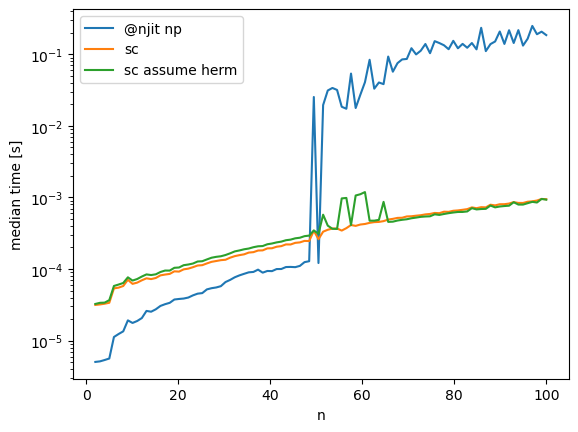

In [10]:
from matplotlib import pyplot as plt
plt.plot( np.linspace(2,N,N-2), np.median(times_njit,axis=1) , label="@njit np")
plt.plot( np.linspace(2,N,N-2), np.median(times_sc,axis=1), label="sc")
plt.plot( np.linspace(2,N,N-2), np.median(times_sc_assume,axis=1), label="sc assume herm")
#plt.plot( np.linspace(2,N,N-1), np.median(times_np,axis=1), label="np")


plt.xlabel("n")
plt.ylabel("median time [s]")
plt.legend()
plt.yscale("log")